In [1]:
import os
import sys

# Importante, serve a fare in modo che il jupyter notebook possa vedere ed importare i file di libreria che creiamo in questa cartella.
sys.path.insert(0, '..')

In [2]:
# Pandas
import pandas as pd

# Valutatore del modello
import functions.evaluation as evaluation

# Funzioni di caricamento dati
import functions.load as load

# Modelli da testare
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Bagging e Boosting
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor

In [3]:
# Carico il dataset con le features scelte a mano
df = pd.read_csv(r'../data/ridge_features_refined_data.csv')
df

,Lot_Area,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Exter_Qual,Bsmt_Qual,Bsmt_Exposure,BsmtFin_Type_1,Bsmt_Unf_SF,Total_Bsmt_SF,...,Central_Air_N,Central_Air_Y,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_Detchd,Garage_Type_No_Garage,Sale_Type_'WD ',Year_Sold,Mo_Sold,Sale_Price
0,-2.125439,7,5,0.292336,3,4,3,6,0.799868,0.339314,...,0,1,0,0,0,0,0,2006,3,0.015387
1,-2.123480,7,5,1.114337,3,4,4,6,0.847019,0.412956,...,0,1,0,0,0,0,1,2006,4,0.614236
2,-2.007543,8,5,0.628858,3,4,4,1,0.817310,0.356023,...,0,1,0,0,0,0,1,2006,5,0.631522
3,-2.173043,7,5,0.628858,3,4,3,6,0.098655,0.416660,...,0,1,0,0,0,0,1,2006,5,0.971735
4,-2.085350,7,5,0.334853,3,4,1,1,0.858377,0.420960,...,0,1,0,0,0,0,1,2006,5,0.178497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,1.028198,8,5,-0.790677,3,4,1,6,0.291247,0.347376,...,0,1,0,0,0,0,1,2008,12,0.956894
2923,0.155339,8,5,1.236544,3,3,1,1,0.190202,-0.635578,...,0,1,0,0,0,0,1,2009,1,0.202529
2924,1.119751,8,8,1.026412,3,4,4,5,-0.197325,0.742559,...,0,1,0,0,0,0,1,2009,4,1.235211
2925,0.992519,8,9,1.545469,4,4,4,6,0.058520,0.596752,...,0,1,0,0,0,0,1,2009,6,1.597317


# Lasso Regressor

In [4]:
# Crea il modello di regressione Lasso
model = Lasso()

# Definisco la griglia di iperparametri da provare
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.],
    'max_iter': [10000, 20000, 30000, 40000, 50000]
}

In [5]:
# Crea l'Evaluator per valutare il modello
ev = evaluation.Evaluator(model = model, df = df, ylabel = 'Sale_Price')

In [6]:
# Trova quali sono i parametri migliori per il modello
best_params, best_score = ev.grid_search_cv(params=param_grid)
load.saveBestParameterModel(type(ev.model).__name__,best_params)

best_params, best_score

({'alpha': 0.0001, 'max_iter': 10000, 'model_name': 'Lasso'},
 0.9309813249306105)

In [7]:
# Inseriamole in delle variabili per poterle usare con più semplicità
alpha = best_params['alpha']
max_iter = best_params['max_iter']

Creiamo il modello con i parametri trovati:

In [8]:
# Costruisci il regressore basato su Lasso con i migliori parametri trovati
lasso = Lasso(alpha=alpha, max_iter=max_iter)
lasso

Lasso(alpha=0.0001, max_iter=10000)

In [9]:
# Creiamo l'Evaluator per valutare il modello con i parametri trovati
ev = evaluation.Evaluator(model = lasso, df = df, ylabel = 'Sale_Price')

# Fa splittare il dataset passato al valutatore (test_size = 0.20 di default)
ev.split_dataset()

In [10]:
# Valutiamo il modello secondo un Cross-Validation temporale
ev.temporal_cv(verbose=True).inline()

[Split 0/10] - train_size: 0.093
r2: 0.90481  -  explained_variance: 0.90502  -  rmse: 0.28117  -  mae: 0.16545  -  max_error: 0.95574

[Split 1/10] - train_size: 0.183
r2: 0.91712  -  explained_variance: 0.91744  -  rmse: 0.29345  -  mae: 0.17678  -  max_error: 1.50125

[Split 2/10] - train_size: 0.274
r2: 0.91486  -  explained_variance: 0.91933  -  rmse: 0.31476  -  mae: 0.15586  -  max_error: 1.58319

[Split 3/10] - train_size: 0.365
r2: 0.94105  -  explained_variance: 0.94463  -  rmse: 0.22455  -  mae: 0.13286  -  max_error: 1.04873

[Split 4/10] - train_size: 0.456
r2: 0.93018  -  explained_variance: 0.93348  -  rmse: 0.23532  -  mae: 0.12382  -  max_error: 0.78049

[Split 5/10] - train_size: 0.546
r2: 0.90948  -  explained_variance: 0.91068  -  rmse: 0.30331  -  mae: 0.13941  -  max_error: 1.10682

[Split 6/10] - train_size: 0.637
r2: 0.89680  -  explained_variance: 0.89747  -  rmse: 0.35929  -  mae: 0.14175  -  max_error: 3.00884

[Split 7/10] - train_size: 0.728
r2: 0.94621  - 

'r2: 0.92195  -  explained_variance: 0.92391  -  rmse: 0.27396  -  mae: 0.14305  -  max_error: 1.33614'

In [11]:
# Valutiamo il modello sul test set
ev.evaluate()

r2:                  0.89836
explained_variance:  0.89836
rmse:                0.32220
mae:                 0.15705
max_error:           3.86949

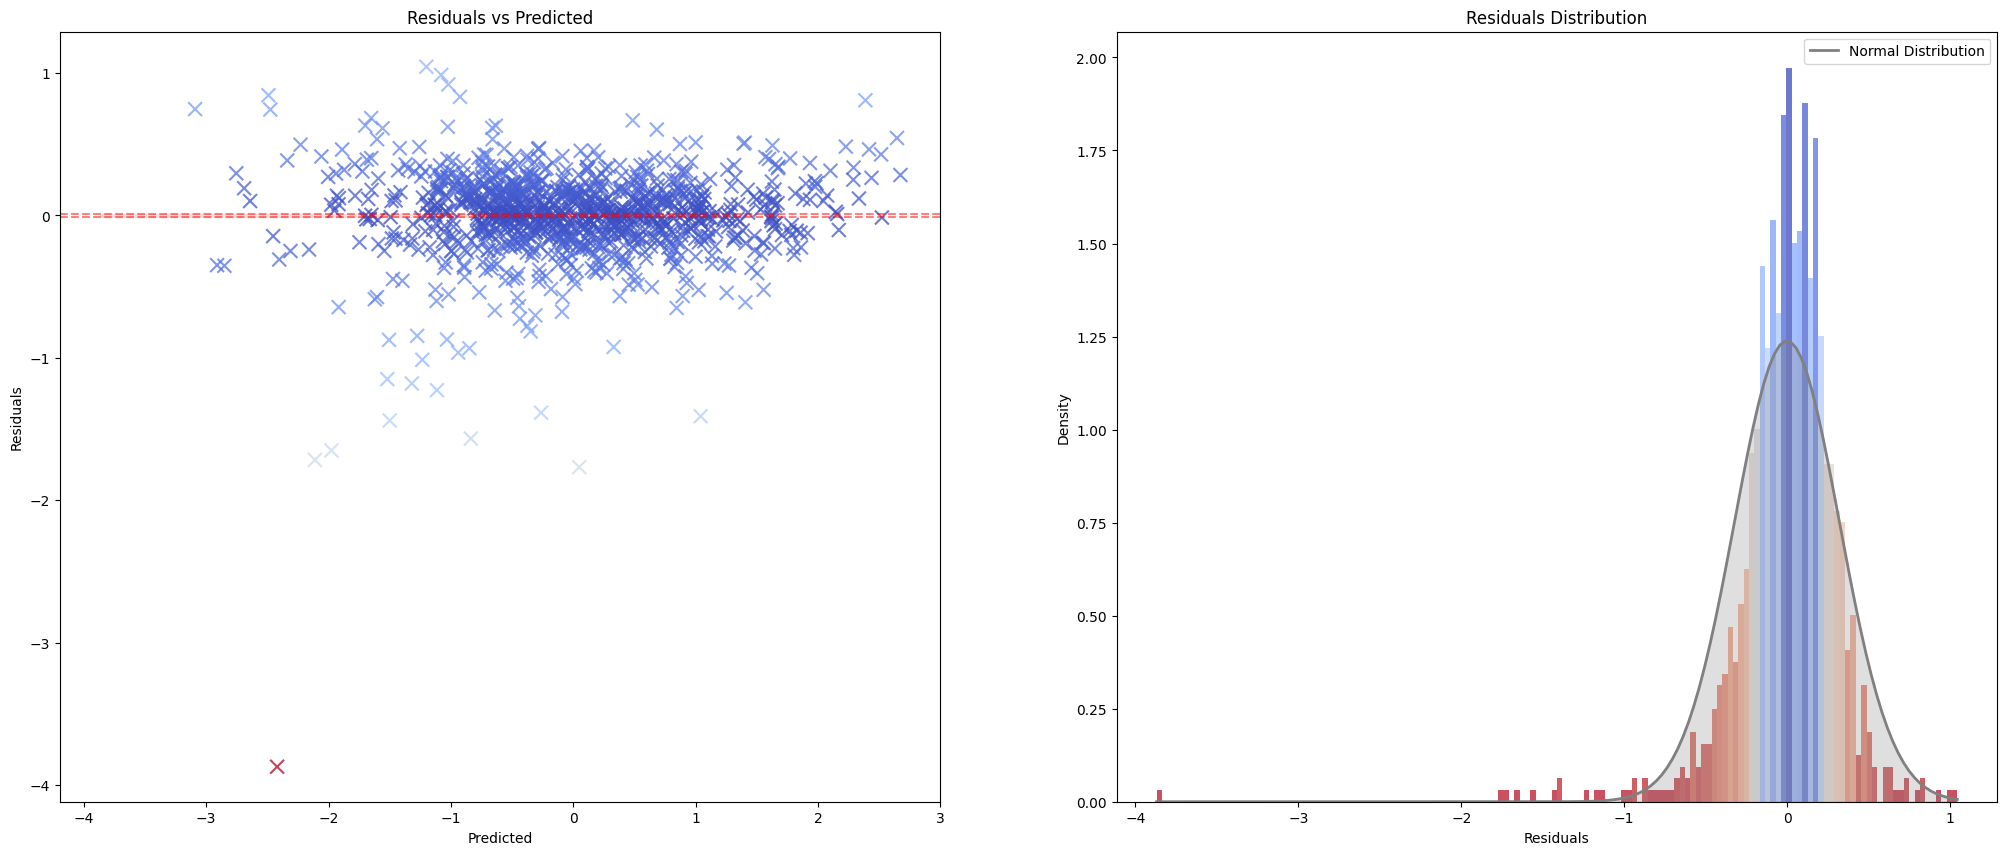

In [12]:
# Mostra i residui e la loro distribuzione
ev.plot_residuals()

# Ridge Regressor

In [13]:
# Crea il modello di regressione basato su Ridge
model = Ridge()

# Definisco la griglia di iperparametri da provare
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.],
    'max_iter': [10000, 20000, 30000, 40000, 50000]
}

In [14]:
# Crea l'Evaluator per valutare il modello
ev = evaluation.Evaluator(model = model, df = df, ylabel = 'Sale_Price')

In [15]:
# Trova quali sono i parametri migliori per il modello
best_params, best_score = ev.grid_search_cv(params=param_grid)
load.saveBestParameterModel(type(ev.model).__name__,best_params)

best_params, best_score

({'alpha': 5.0, 'max_iter': 10000, 'model_name': 'Ridge'}, 0.9315334078104716)

In [16]:
# Inseriamole in delle variabili per poterle usare con più semplicità
alpha = best_params['alpha']
max_iter = best_params['max_iter']

Creiamo il modello con i parametri trovati:

In [17]:
# Costruisci il regressore basato su Ridge con i migliori parametri trovati
ridge = Ridge(alpha=alpha, max_iter=max_iter)
ridge

Ridge(alpha=5.0, max_iter=10000)

In [18]:
# Creiamo l'Evaluator per valutare il modello con i parametri trovati
ev = evaluation.Evaluator(model = ridge, df = df, ylabel = 'Sale_Price')

# Fa splittare il dataset passato al valutatore (test_size = 0.20 di default)
ev.split_dataset()

In [19]:
# Valutiamo il modello secondo un Cross-Validation temporale
ev.temporal_cv(verbose=True).inline()

[Split 0/10] - train_size: 0.093
r2: 0.94177  -  explained_variance: 0.94215  -  rmse: 0.21991  -  mae: 0.14119  -  max_error: 0.77226

[Split 1/10] - train_size: 0.183
r2: 0.92568  -  explained_variance: 0.92581  -  rmse: 0.27788  -  mae: 0.18016  -  max_error: 1.45704

[Split 2/10] - train_size: 0.274
r2: 0.91964  -  explained_variance: 0.92364  -  rmse: 0.30579  -  mae: 0.13640  -  max_error: 1.53997

[Split 3/10] - train_size: 0.365
r2: 0.94175  -  explained_variance: 0.94454  -  rmse: 0.22322  -  mae: 0.12825  -  max_error: 0.98184

[Split 4/10] - train_size: 0.456
r2: 0.93171  -  explained_variance: 0.93560  -  rmse: 0.23272  -  mae: 0.11855  -  max_error: 0.78414

[Split 5/10] - train_size: 0.546
r2: 0.91206  -  explained_variance: 0.91339  -  rmse: 0.29897  -  mae: 0.13737  -  max_error: 1.08156

[Split 6/10] - train_size: 0.637
r2: 0.89655  -  explained_variance: 0.89720  -  rmse: 0.35973  -  mae: 0.13740  -  max_error: 3.04262

[Split 7/10] - train_size: 0.728
r2: 0.94709  - 

'r2: 0.92743  -  explained_variance: 0.92933  -  rmse: 0.26454  -  mae: 0.13770  -  max_error: 1.30564'

In [20]:
# Valutiamo il modello sul test set
ev.evaluate()

r2:                  0.89861
explained_variance:  0.89861
rmse:                0.32180
mae:                 0.15604
max_error:           3.85431

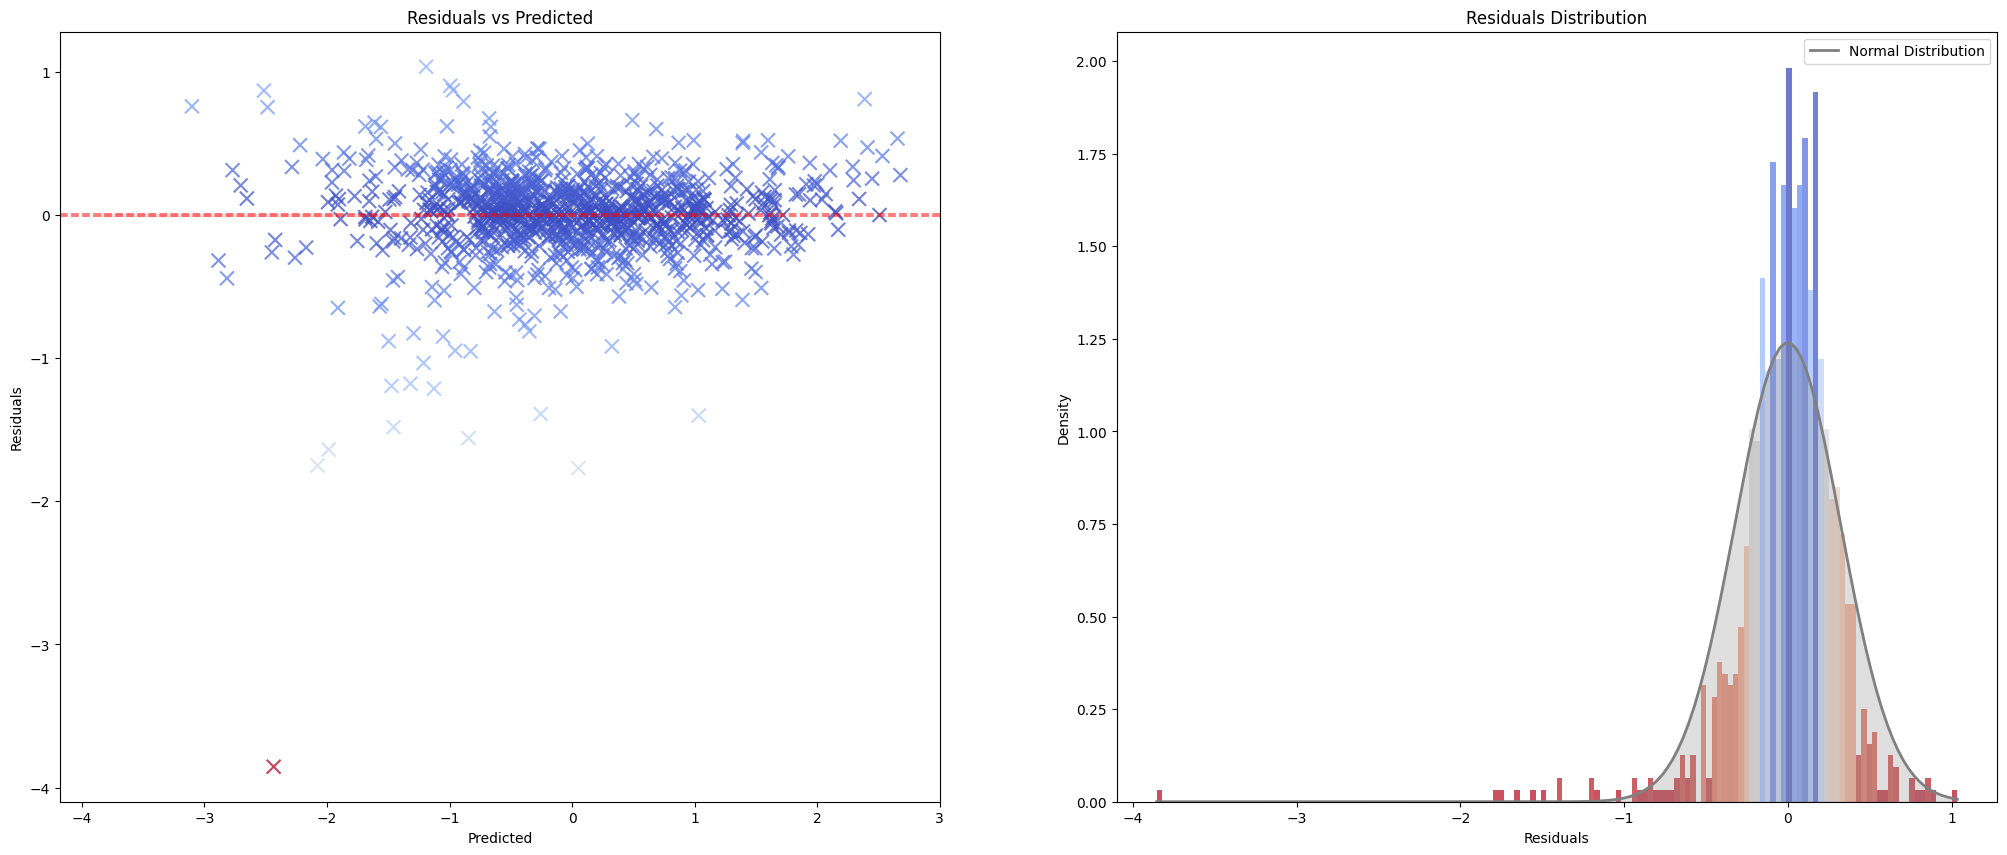

In [21]:
# Mostra i residui e la loro distribuzione
ev.plot_residuals()

# Elastic-Net Regressor

In [22]:
# Crea il modello di regressione basato su Elastic-Net
model = ElasticNet()

# Definisco la griglia di iperparametri da provare
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.],
    'l1_ratio': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
    'max_iter': [10000, 20000, 30000, 40000, 50000]
}

In [23]:
# Crea l'Evaluator per valutare il modello
ev = evaluation.Evaluator(model = model, df = df, ylabel = 'Sale_Price')

In [24]:
# Trova quali sono i parametri migliori per il modello
best_params, best_score = ev.grid_search_cv(params=param_grid)
load.saveBestParameterModel(type(ev.model).__name__,best_params)

best_params, best_score

({'alpha': 0.001,
  'l1_ratio': 0.1,
  'max_iter': 10000,
  'model_name': 'ElasticNet'},
 0.9311652299827295)

In [25]:
# Inseriamole in delle variabili per poterle usare con più semplicità
alpha = best_params['alpha']
l1_ratio = best_params['l1_ratio']
max_iter = best_params['max_iter']

Creiamo il modello con i parametri trovati:

In [26]:
# Costruisci il regressore basato su ElasticNet con i migliori parametri trovati
elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter)
elasticnet

ElasticNet(alpha=0.001, l1_ratio=0.1, max_iter=10000)

In [27]:
# Creiamo l'Evaluator per valutare il modello con i parametri trovati
ev = evaluation.Evaluator(model = elasticnet, df = df, ylabel = 'Sale_Price')

# Fa splittare il dataset passato al valutatore (test_size = 0.20 di default)
ev.split_dataset()

In [28]:
# Valutiamo il modello secondo un Cross-Validation temporale
ev.temporal_cv(verbose=True).inline()

[Split 0/10] - train_size: 0.093
r2: 0.92122  -  explained_variance: 0.92165  -  rmse: 0.25579  -  mae: 0.15801  -  max_error: 0.86641

[Split 1/10] - train_size: 0.183
r2: 0.91904  -  explained_variance: 0.91925  -  rmse: 0.29004  -  mae: 0.17312  -  max_error: 1.51350

[Split 2/10] - train_size: 0.274
r2: 0.91626  -  explained_variance: 0.92065  -  rmse: 0.31217  -  mae: 0.13689  -  max_error: 1.56975

[Split 3/10] - train_size: 0.365
r2: 0.94135  -  explained_variance: 0.94472  -  rmse: 0.22398  -  mae: 0.12998  -  max_error: 1.03390

[Split 4/10] - train_size: 0.456
r2: 0.93062  -  explained_variance: 0.93412  -  rmse: 0.23457  -  mae: 0.12368  -  max_error: 0.78211

[Split 5/10] - train_size: 0.546
r2: 0.91042  -  explained_variance: 0.91165  -  rmse: 0.30173  -  mae: 0.14191  -  max_error: 1.09922

[Split 6/10] - train_size: 0.637
r2: 0.89639  -  explained_variance: 0.89705  -  rmse: 0.36001  -  mae: 0.14150  -  max_error: 3.03042

[Split 7/10] - train_size: 0.728
r2: 0.94666  - 

'r2: 0.92402  -  explained_variance: 0.92598  -  rmse: 0.27062  -  mae: 0.14017  -  max_error: 1.32947'

In [29]:
# Valutiamo il modello sul test set
ev.evaluate()

r2:                  0.89858
explained_variance:  0.89858
rmse:                0.32185
mae:                 0.15773
max_error:           3.86074

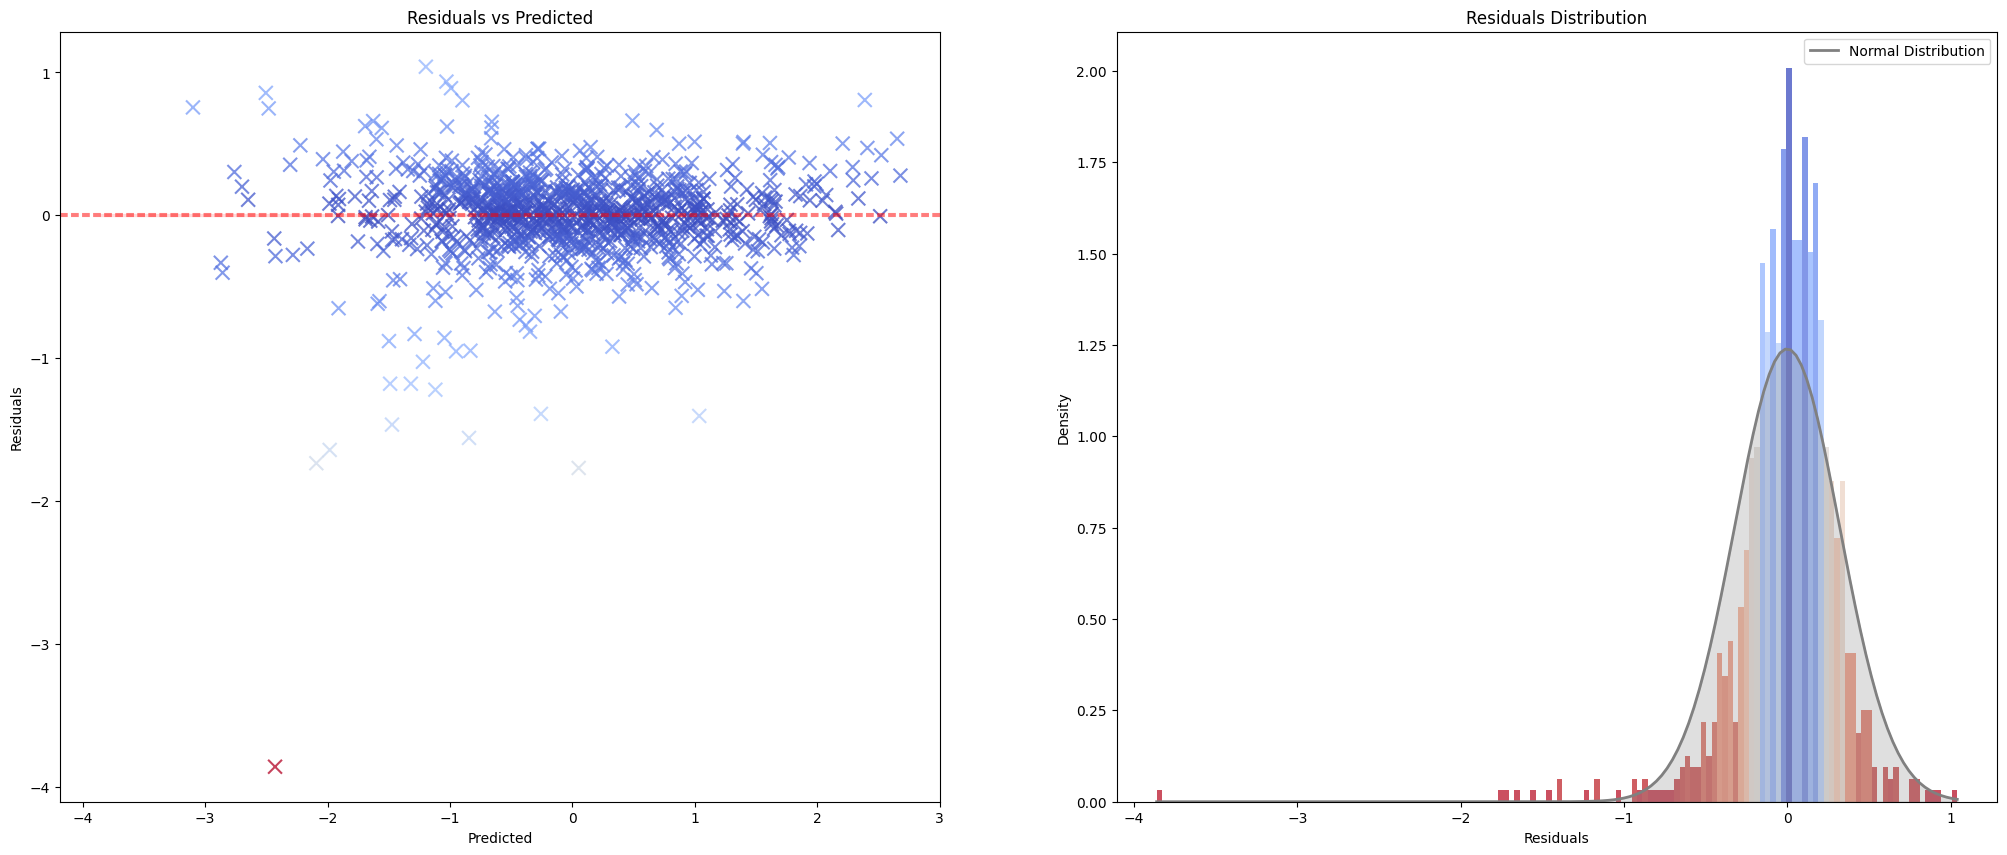

In [30]:
# Mostra i residui e la loro distribuzione
ev.plot_residuals()

# Bagging dei modelli

In [31]:
# Crea degli Ensemblers che usano Lasso, Ridge e ElasticNet come Weak Learners
bagged_lasso = BaggingRegressor(lasso, n_estimators = 200)
bagged_ridge = BaggingRegressor(ridge, n_estimators = 200)
bagged_net   = BaggingRegressor(elasticnet, n_estimators = 200)

### Bagged Lasso

In [32]:
ev = evaluation.Evaluator(model = bagged_lasso, df = df, ylabel = 'Sale_Price')
ev.evaluate()

r2:                  0.89856
explained_variance:  0.89856
rmse:                0.32189
mae:                 0.15731
max_error:           3.88605

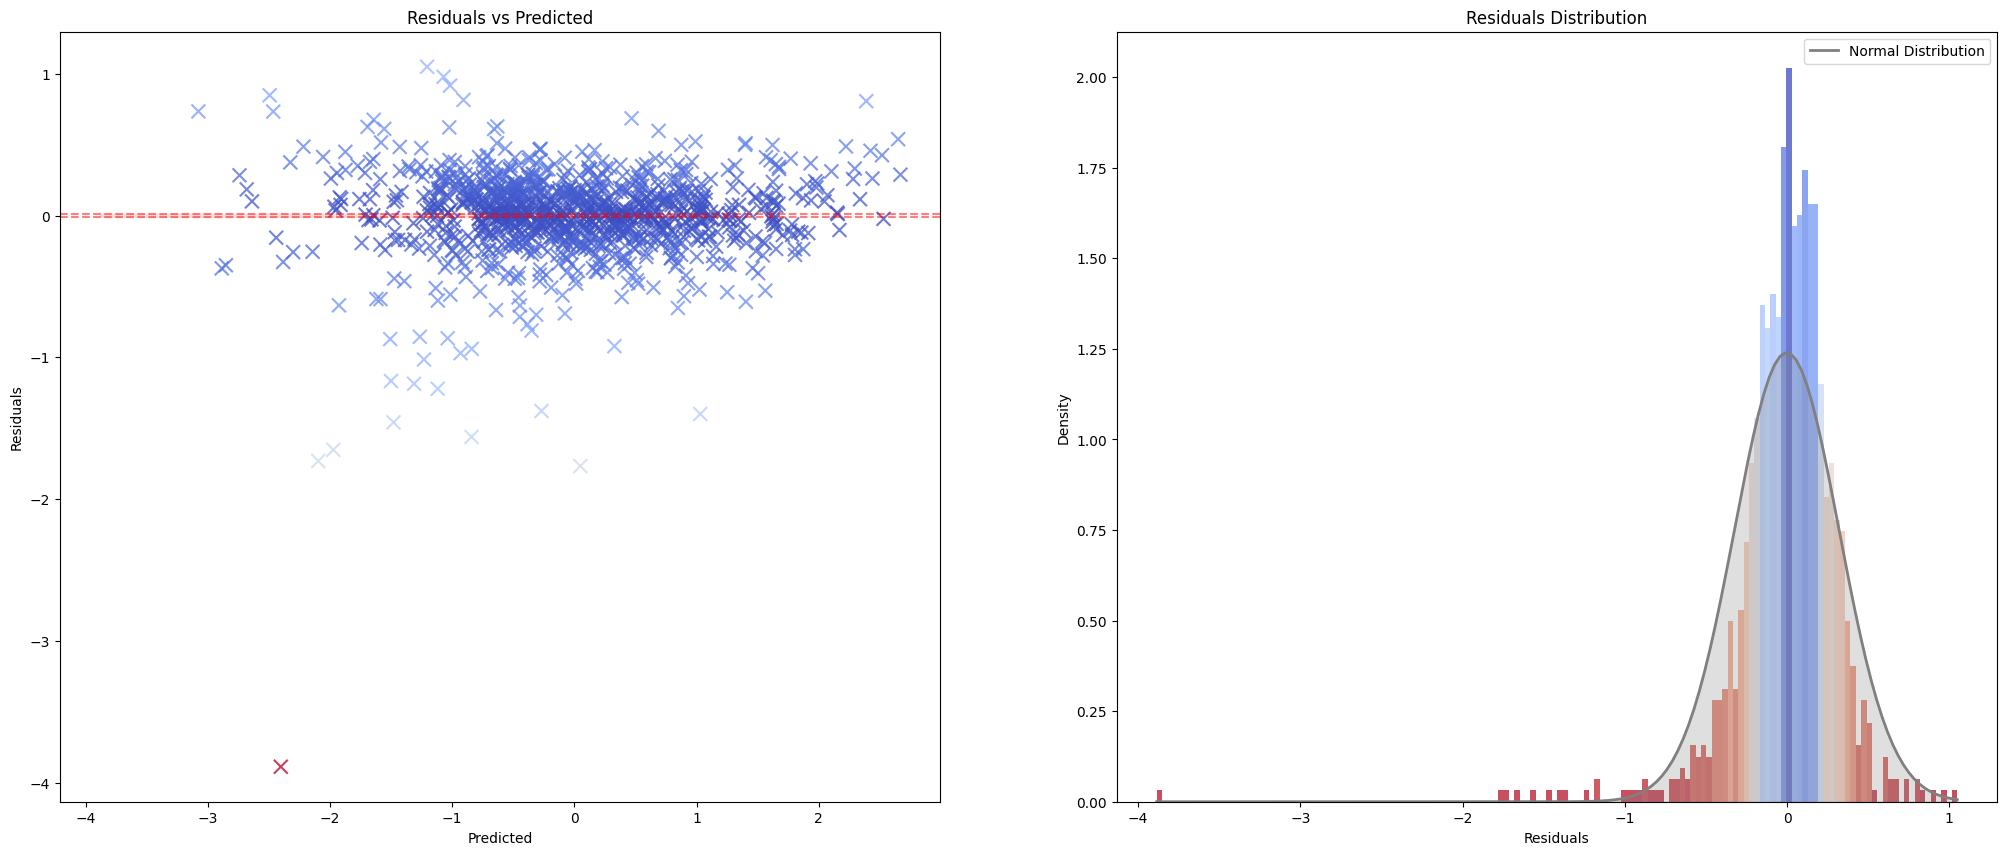

In [33]:
ev.plot_residuals()

### Bagged Ridge

In [34]:
ev = evaluation.Evaluator(model = bagged_ridge, df = df, ylabel = 'Sale_Price')
ev.evaluate()

r2:                  0.89873
explained_variance:  0.89873
rmse:                0.32161
mae:                 0.15730
max_error:           3.86850

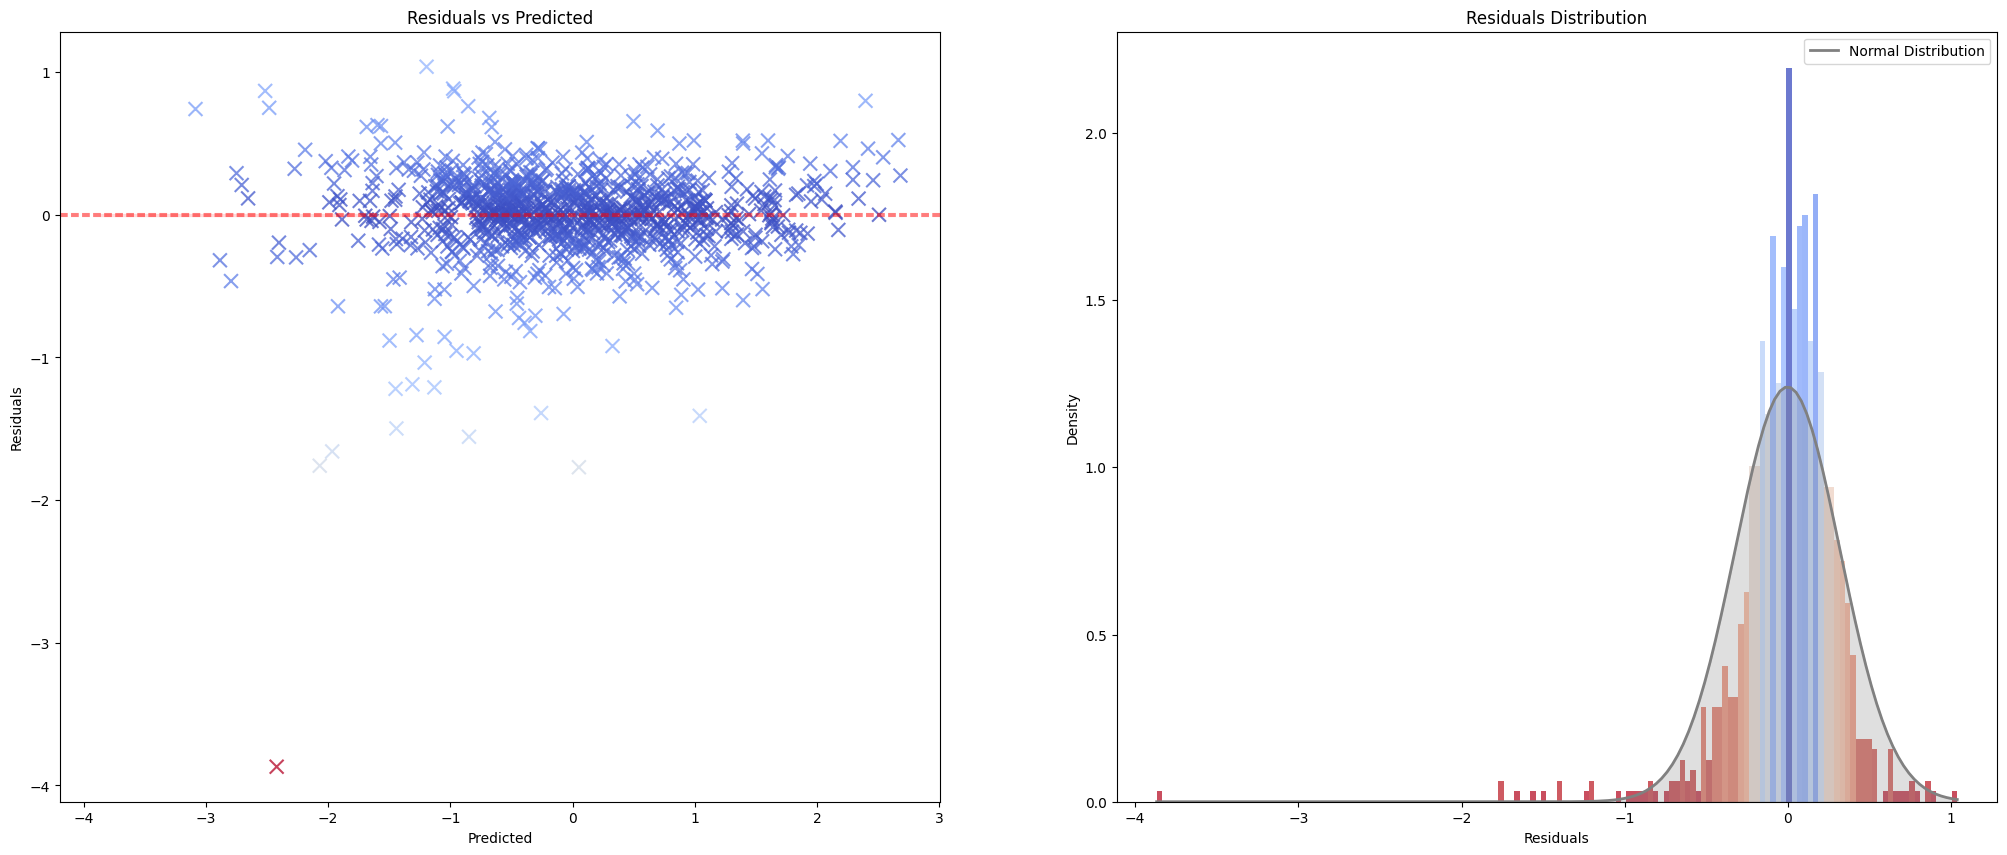

In [35]:
ev.plot_residuals()

### Bagged ElasticNet

In [36]:
ev = evaluation.Evaluator(model = bagged_net, df = df, ylabel = 'Sale_Price')
ev.evaluate()

r2:                  0.89868
explained_variance:  0.89870
rmse:                0.32168
mae:                 0.15652
max_error:           3.87675

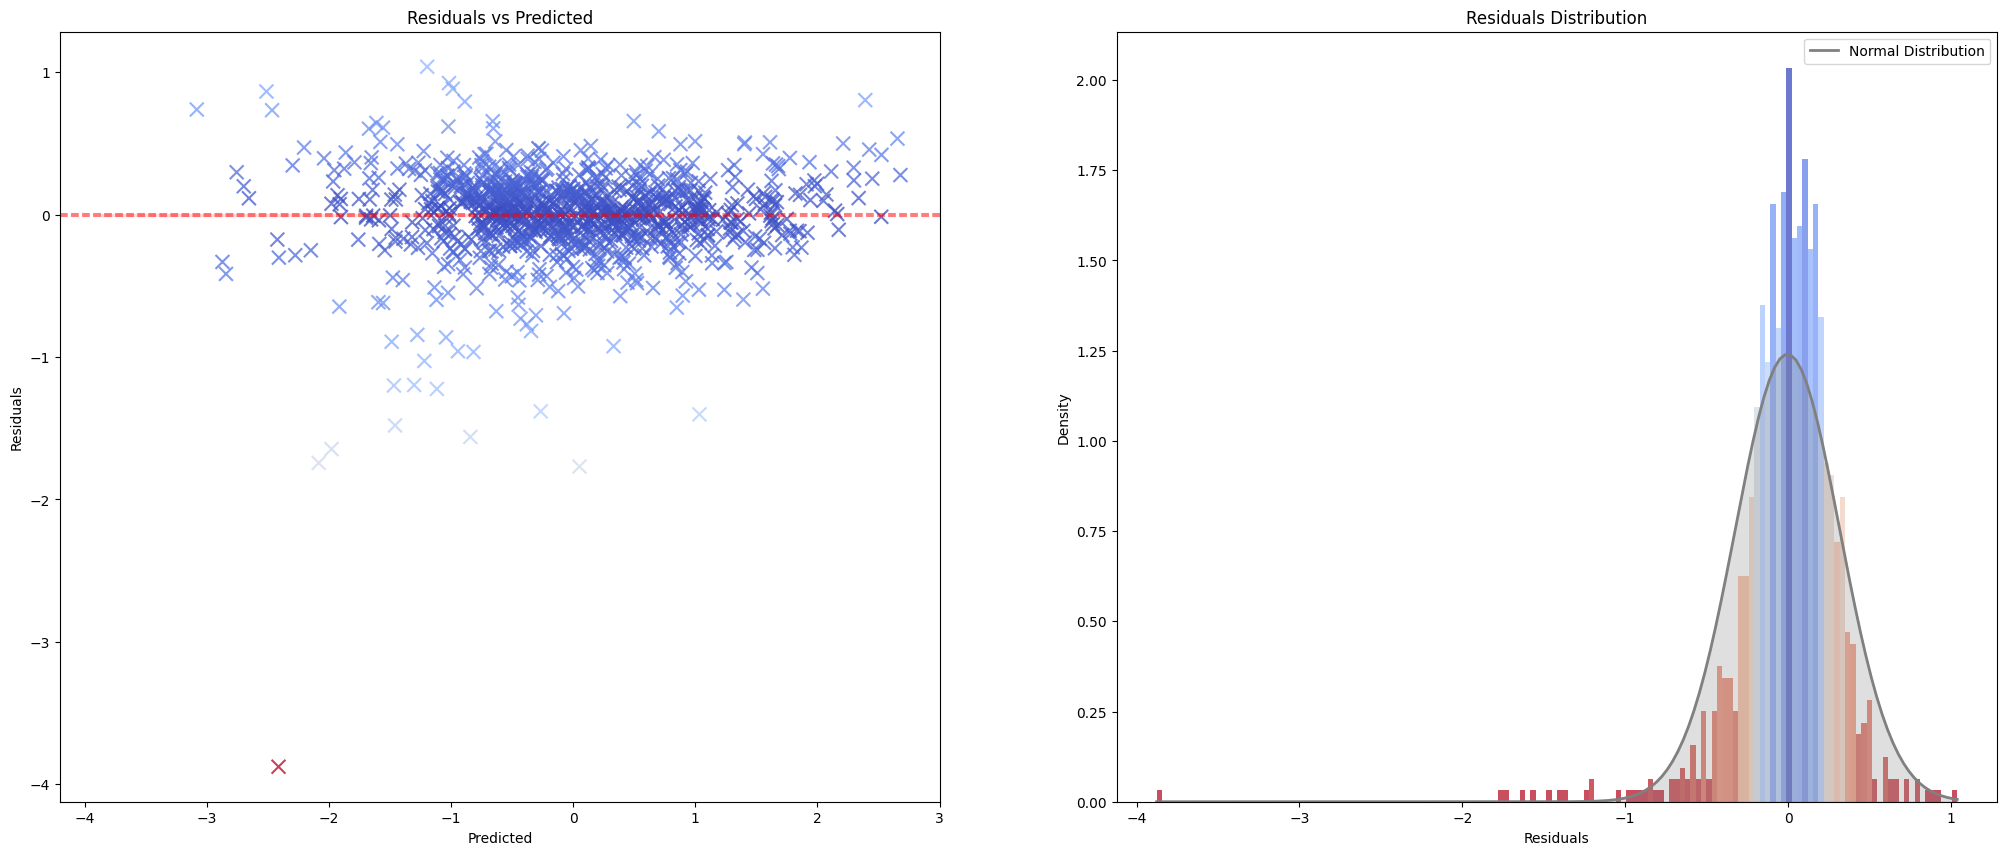

In [37]:
ev.plot_residuals()

# Boosting dei modelli

In [38]:
# Crea degli Ensemblers che usano Lasso, Ridge e ElasticNet come Weak Learners
boosted_lasso = AdaBoostRegressor(lasso, n_estimators = 200)
boosted_ridge = AdaBoostRegressor(ridge, n_estimators = 200)
boosted_net   = AdaBoostRegressor(elasticnet, n_estimators = 200)

### Boosted Lasso

In [39]:
ev = evaluation.Evaluator(model = boosted_lasso, df = df, ylabel = 'Sale_Price')
ev.evaluate()

r2:                  0.87387
explained_variance:  0.87599
rmse:                0.35892
mae:                 0.19494
max_error:           3.84262

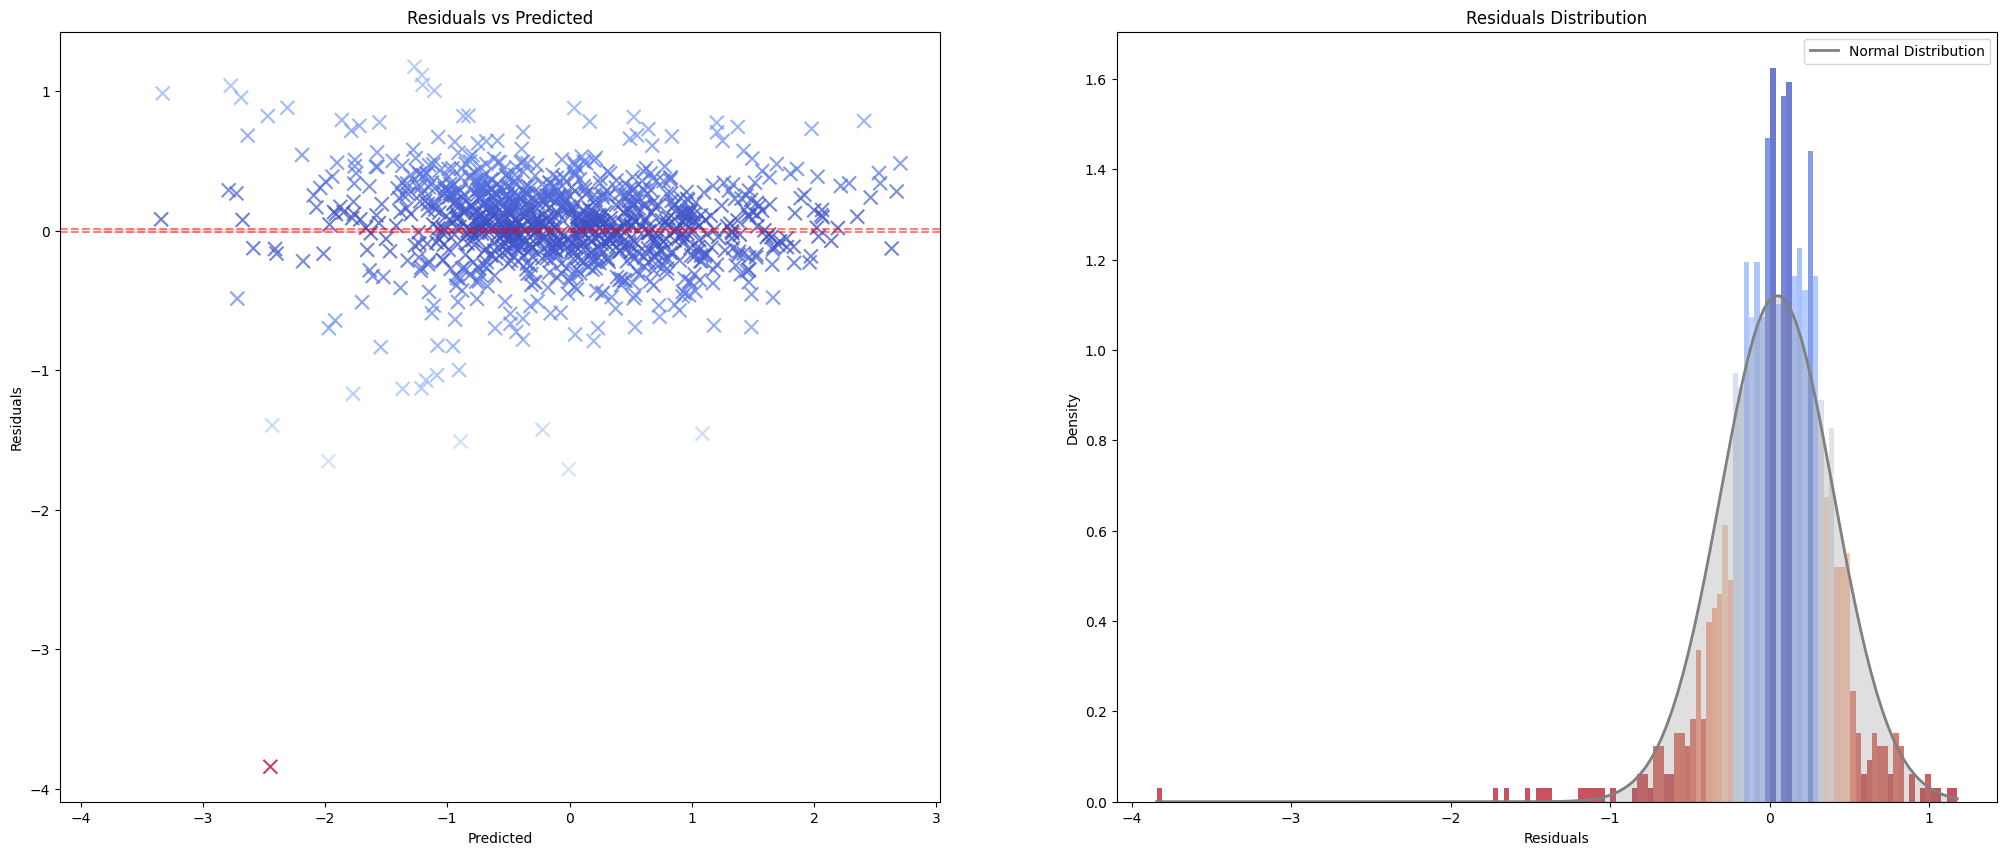

In [40]:
ev.plot_residuals()

### Boosted Ridge

In [41]:
ev = evaluation.Evaluator(model = boosted_ridge, df = df, ylabel = 'Sale_Price')
ev.evaluate()

r2:                  0.87813
explained_variance:  0.88143
rmse:                0.35281
mae:                 0.19322
max_error:           3.85079

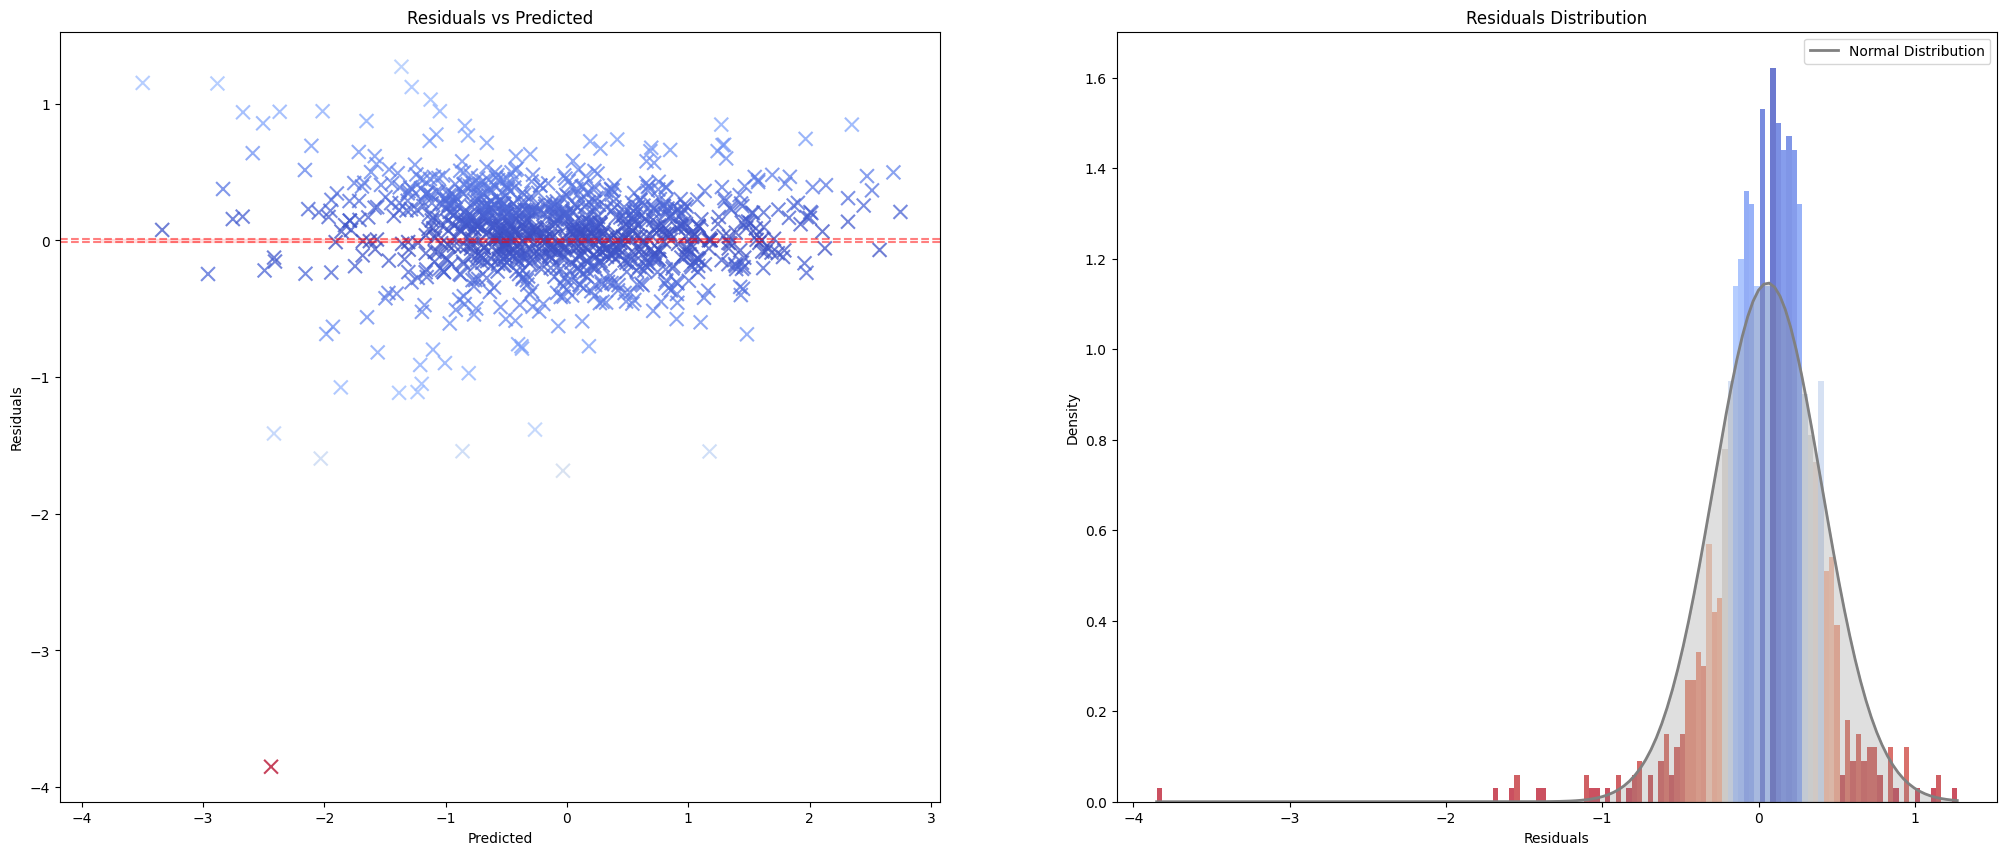

In [42]:
ev.plot_residuals()

### Boosted ElasticNet

In [43]:
ev = evaluation.Evaluator(model = boosted_net, df = df, ylabel = 'Sale_Price')
ev.evaluate()

r2:                  0.87899
explained_variance:  0.88132
rmse:                0.35156
mae:                 0.18512
max_error:           3.78925

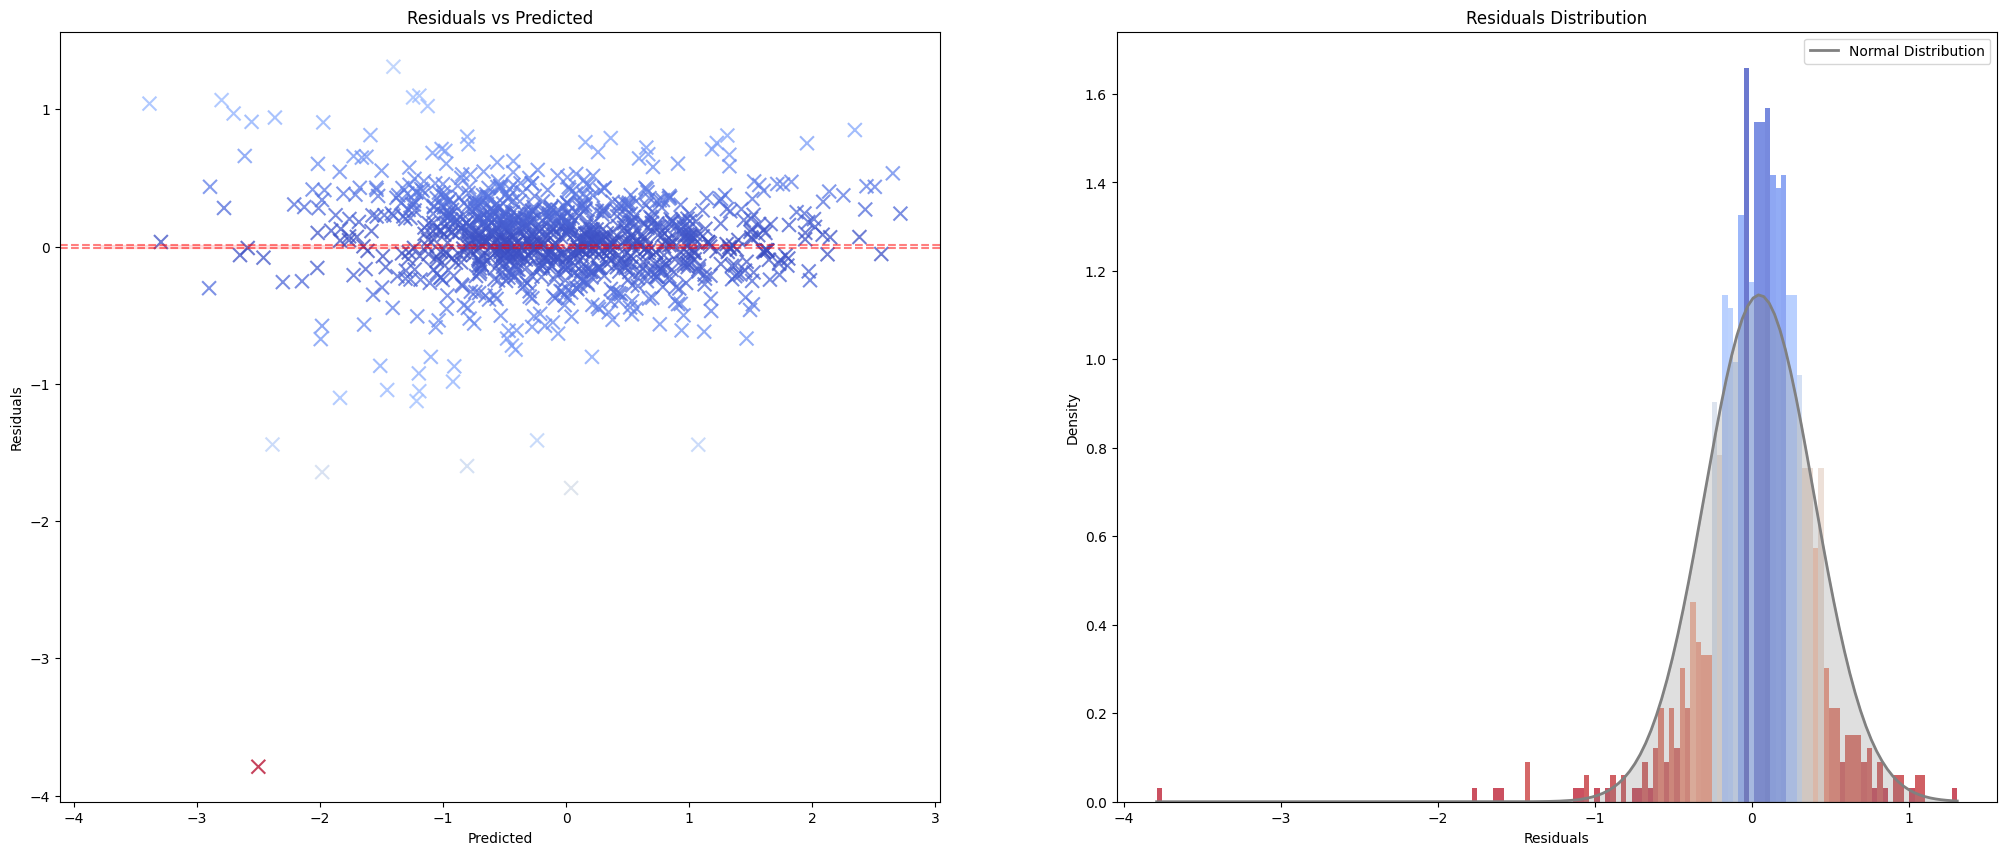

In [44]:
ev.plot_residuals()